In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import norm

In [22]:
data = [3.3,3.5,3.1,1.8,3.0,0.74,2.5,2.4,1.6,2.1,2.4,1.3,1.7,0.19]
sigma2 = 1
tau2 = 5

In [23]:
def posterior_predictive(x):
    mean = sum(x) / ((sigma2 / tau2) + len(x))
    var = (1 / ((len(x) / sigma2) + (1 / tau2))) + sigma2
    return norm(mean, var)

def mle_dist(x):
    mean = sum(x) / len(x)
    var = sigma2
    return norm(mean, var)

def map_dist(x):
    mean = sum(x) / ((sigma2 / tau2) + len(x))
    var = sigma2
    return norm(mean, var)

In [44]:
def create_plots(data):
    x = np.arange(-10, 10, 0.1)
    for i in range(1, len(data) + 1):
        plt.figure()
        plt.xlabel('X')
        plt.ylabel('Density')
        plt.title(f'After {i} Data Points')
        for dist in [posterior_predictive, mle_dist, map_dist]:
            y = dist(data[:i]).pdf(x)
            plt.plot(x, y)
        red = mpatches.Patch(color='tab:blue', label='Posterior Predictive')
        blue = mpatches.Patch(color='tab:orange', label='MLE')
        green = mpatches.Patch(color='tab:green', label='MAP')
        plt.legend(handles=[red, blue, green])
        plt.savefig(f'{i}.png')
        plt.show()

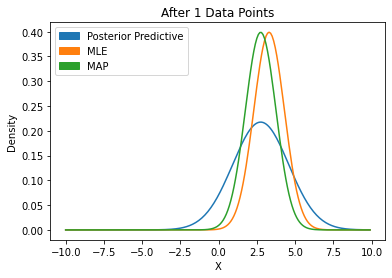

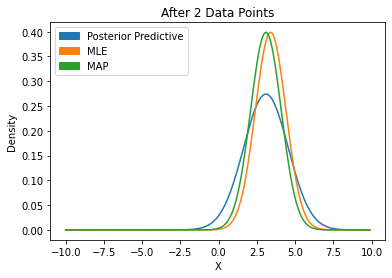

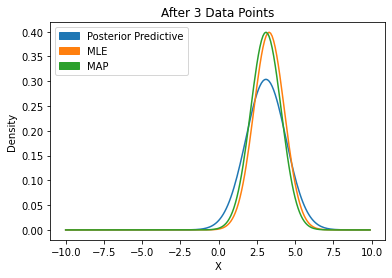

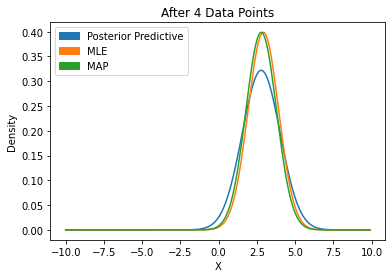

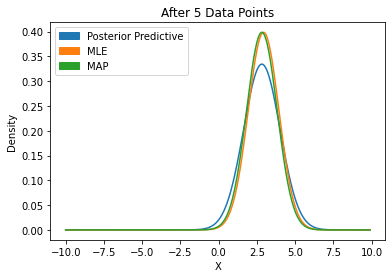

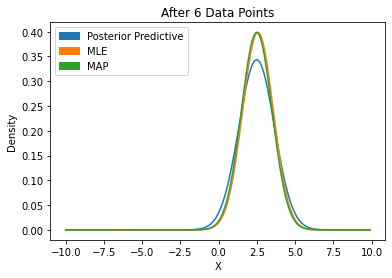

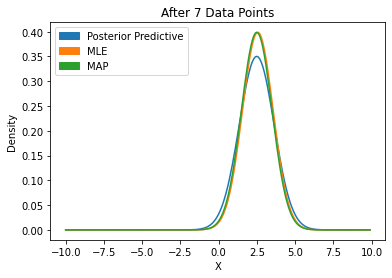

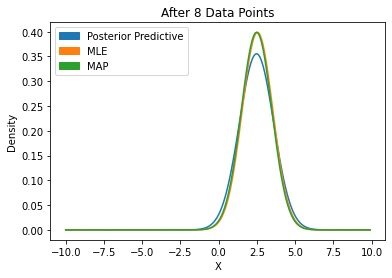

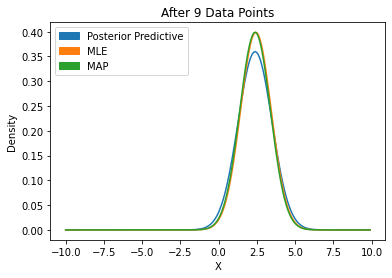

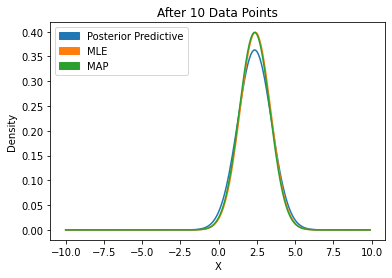

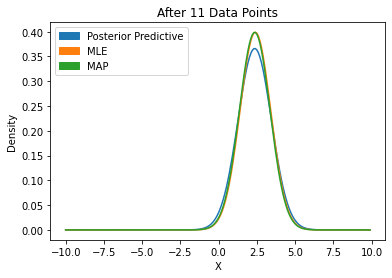

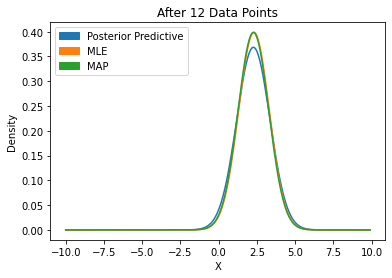

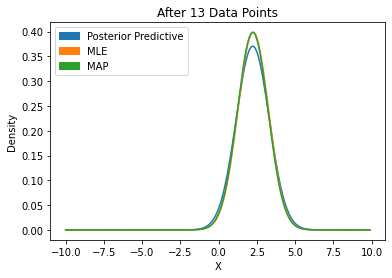

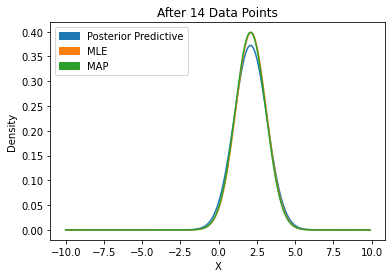

In [45]:
create_plots(data)

In [15]:
data = [3.3,3.5,3.1,1.8,3.0,0.74,2.5,2.4,1.6,2.1,2.4,1.3,1.7,0.19]
sigma2 = 1
sigma = np.sqrt(sigma2)
tau2 = 5
tau = np.sqrt(tau2)
n = len(data)

sum_x = sum(data)
sum_x2 = np.sum(np.array(data) ** 2)

a = 1 / (2 * sigma2)
b = ((sum_x ** 2) / (n + (sigma2/tau2))) - sum_x2
numerator = sigma * np.exp(a * b)

c = (sigma * np.sqrt(2 * np.pi)) ** n
d = n + (sigma2/tau2)
denominator = tau * c * np.sqrt(d)

print(numerator / denominator)

4.4628726620180894e-10


In [16]:
data = [3.3,3.5,3.1,1.8,3.0,0.74,2.5,2.4,1.6,2.1,2.4,1.3,1.7,0.19]
sigma2 = 1
sigma = np.sqrt(sigma2)
tau2 = 0.1
tau = np.sqrt(tau2)
n = len(data)

sum_x = sum(data)
sum_x2 = np.sum(np.array(data) ** 2)

a = 1 / (2 * sigma2)
b = ((sum_x ** 2) / (n + (sigma2/tau2))) - sum_x2
numerator = sigma * np.exp(a * b)

c = (sigma * np.sqrt(2 * np.pi)) ** n
d = n + (sigma2/tau2)
denominator = tau * c * np.sqrt(d)

print(numerator / denominator)

7.999704829619985e-15
